# Machine Learning Challenge 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcdefaults()
plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))

## Data Analysis

In [2]:
trainData = pd.read_csv('data_train_db.csv')
testData = pd.read_csv('data_test_db.csv')

In [3]:
trainData

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
0,1.0,1.0,0.472619,0.681050,0.884694,0.888819,0.949818,0.656389,0.788241,8.031743,...,0.921479,0.759088,0.742684,0.958868,0.546771,0.736409,0.471570,0.986777,0.600762,0.412784
1,1.0,1.0,0.688965,0.988019,0.716011,0.567877,0.463229,0.424654,0.931444,5.165232,...,0.562749,0.932735,0.684856,0.914809,0.972892,0.450422,0.471924,0.453124,0.976749,0.597788
2,1.0,1.0,0.788401,0.752765,0.801923,0.847497,0.743526,0.931443,0.768209,9.436875,...,0.881300,0.417064,0.468547,0.796907,0.986931,0.847634,0.728937,0.895689,0.970808,0.752744
3,0.0,1.0,0.739938,0.517953,0.431417,0.894524,0.752744,0.907213,0.871284,3.651928,...,0.926289,0.464410,0.958722,0.520464,0.999992,0.838839,0.506759,0.662043,0.659098,0.953559
4,1.0,1.0,0.525988,0.532473,0.920489,0.898508,0.707683,0.743687,0.726896,6.582867,...,0.434560,0.746746,0.466800,0.942878,0.781556,0.850591,0.592054,0.549517,0.574893,0.472128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.769291,0.511468,0.771281,0.492626,0.628502,0.567015,0.486130,3.870176,...,0.805892,0.685387,0.569820,0.720401,0.589550,0.951099,0.953269,0.827084,0.426152,0.413168
1996,0.0,1.0,0.919421,0.602992,0.486138,0.749335,0.550056,0.951137,0.531395,0.243047,...,0.458277,0.760053,0.966851,0.664607,0.612039,0.523509,0.470116,0.644703,0.664134,0.786282
1997,0.0,1.0,0.567702,0.849342,0.667941,0.618418,0.699603,0.964992,0.608648,0.306824,...,0.666477,0.443474,0.891313,0.755928,0.553219,0.831568,0.877086,0.493750,0.507971,0.743835
1998,1.0,1.0,0.775856,0.519847,0.639920,0.708855,0.529903,0.892855,0.615023,6.214098,...,0.671941,0.849912,0.841967,0.430774,0.426931,0.597850,0.934105,0.773715,0.830040,0.645828


In [4]:
trainData.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.311500,0.824642,0.732381,0.670628,0.658450,0.732612,0.724687,0.710984,0.650322,5.055976,...,0.727262,0.696894,0.750866,0.734427,0.709659,0.718897,0.657022,0.713340,0.737840,0.658718
std,0.463222,0.712109,2.280995,1.275480,1.410498,0.932445,1.290294,0.546794,1.896914,2.913774,...,1.486712,1.137658,1.026275,1.003642,1.767397,0.881690,2.225722,1.950032,1.714560,1.515071
min,0.000000,-22.759721,-38.055832,-40.878137,-50.779683,0.400771,-18.190763,-9.042823,-58.024379,-16.002695,...,-10.323221,-37.190701,0.400418,-2.200456,-35.383528,-14.777491,-78.787165,-59.091836,-38.224559,-63.751219
25%,0.000000,1.000000,0.549734,0.542930,0.551090,0.555667,0.549273,0.560411,0.545552,2.604643,...,0.547473,0.544204,0.557663,0.542622,0.558572,0.553339,0.554327,0.548380,0.551331,0.548054
50%,0.000000,1.000000,0.698123,0.696592,0.706609,0.698498,0.690762,0.704883,0.686504,5.259820,...,0.693606,0.690501,0.710034,0.703849,0.700996,0.710563,0.704225,0.703970,0.702484,0.706985
75%,1.000000,1.000000,0.849506,0.844798,0.852589,0.850872,0.851927,0.851071,0.847418,7.473587,...,0.849670,0.848295,0.852120,0.849593,0.850362,0.851460,0.862595,0.859953,0.851893,0.847668
max,1.000000,12.440382,77.644402,26.567088,2.181685,37.371873,49.427813,15.914141,41.007128,15.007247,...,64.521486,24.881777,27.812705,37.703893,63.615672,21.558254,33.059216,45.192744,50.991319,3.883941


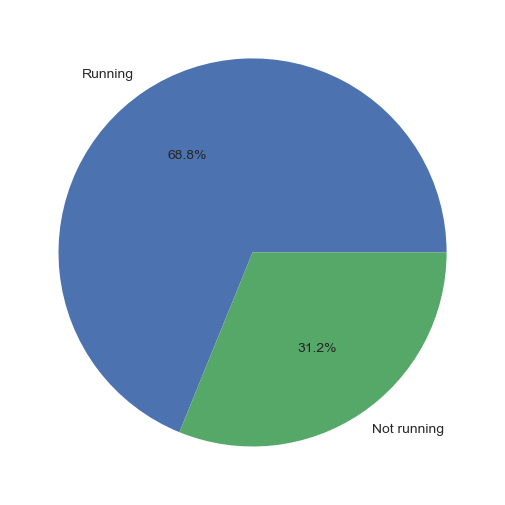

In [5]:
trainData["Running"].value_counts().plot(kind="pie", label="", labels=["Running", "Not running"], autopct="%0.1f%%")
plt.show()

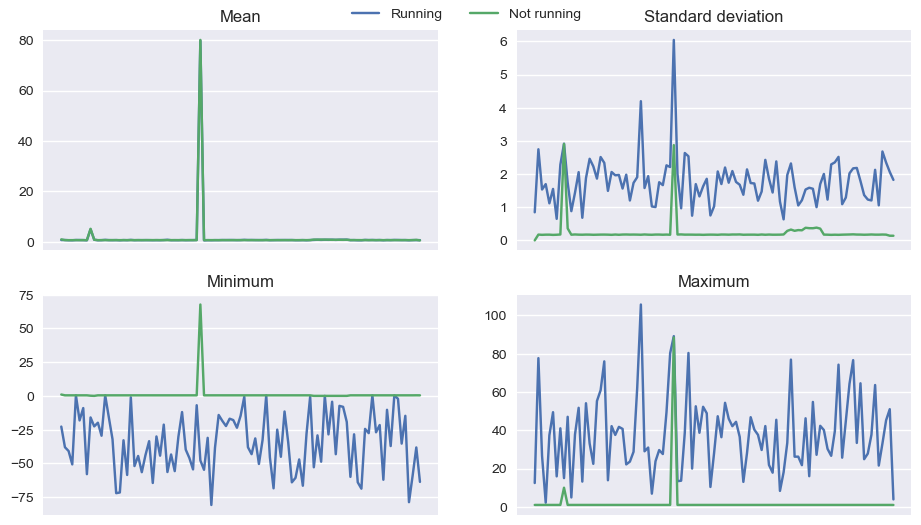

In [6]:
runningGroup = trainData.groupby("Running")

fig, axs = plt.subplots(2, 2)
runningGroup.mean().T.plot(ax=axs[0,0], title="Mean", legend=False, xticks=[])
runningGroup.std().T.plot(ax=axs[0,1], title="Standard deviation", legend=False, xticks=[])
runningGroup.min().T.plot(ax=axs[1,0], title="Minimum", legend=False, xticks=[])
runningGroup.max().T.plot(ax=axs[1,1], title="Maximum", legend=False, xticks=[])
fig.legend(labels = ["Running", "Not running"], ncol = 2, bbox_to_anchor = (0.53, 0.84))
plt.show()

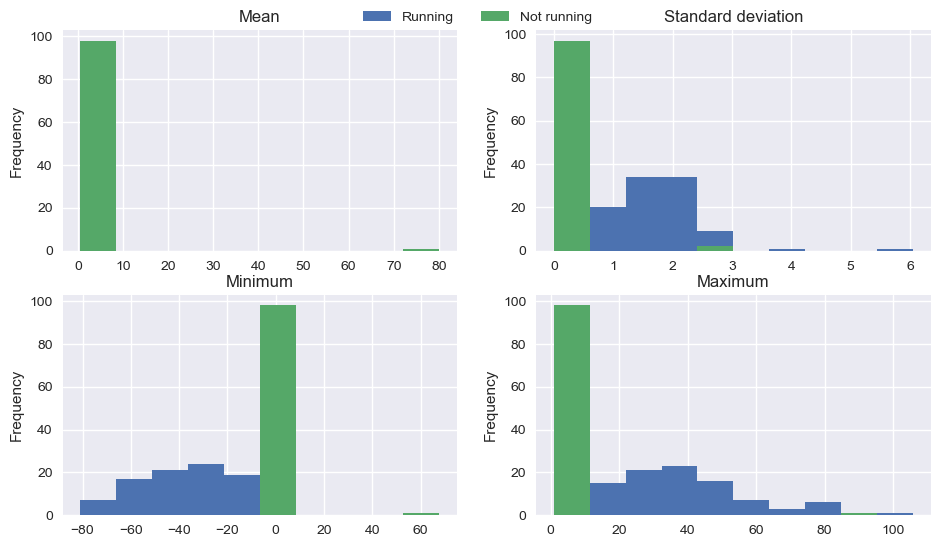

In [7]:
fig, axs = plt.subplots(2, 2)
runningGroup.mean().T.plot(kind="hist", ax=axs[0,0], title="Mean", legend=False)
runningGroup.std().T.plot(kind="hist", ax=axs[0,1], title="Standard deviation", legend=False)
runningGroup.min().T.plot(kind="hist", ax=axs[1,0], title="Minimum", legend=False)
runningGroup.max().T.plot(kind="hist", ax=axs[1,1], title="Maximum", legend=False)
fig.legend(labels = ["Running", "Not running"], ncol = 2, bbox_to_anchor = (0.54, 0.87))
plt.show()

### Data Cleanup

In [8]:
binaryCols = "Running", "Blue Switch On", "User had coffee", "Controller lightgoldenrodyellow", "Controller lightgray", "Controller lightgreen", "Cruise control", "Voltage main", "Voltage secondary", "Counterweight", "Second Counterweight", "Smoke formation", "Bending of test plate"
nonnegativeCols = "CPU Temperature", "Time since restart"
intervalCols = trainData.columns.difference(binaryCols).difference(nonnegativeCols) # every other column

for col in binaryCols:
    dropIndices = trainData[(trainData[col] != 0) & (trainData[col] != 1)].index

for col in nonnegativeCols:
    dropIndices.append(trainData[trainData[col] < 0].index)

for col in intervalCols:
    dropIndices.append(trainData[(trainData[col] > 1) | (trainData[col] < 0)].index)
    
cleanData = trainData.drop(index = dropIndices).drop_duplicates().reset_index(drop=True)

In [9]:
cleanData.describe()

,Running,Blue Switch On,Battery level,Humidity,Magnetic field,Controller beige,Controller bisque,Controller black,Controller blanchedalmond,Time since restart,...,Waste level right tank,Waste level left tank,Helium reservoir,alpha-radiation,Active motion supression,Blade density,Blade rotation,Controller mintcream,Controller mistyrose,Controller moccasin
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,0.312281,0.832080,0.698674,0.697404,0.702571,0.700912,0.699846,0.702833,0.695250,5.073251,...,0.697903,0.693599,0.704726,0.698827,0.701909,0.703049,0.706045,0.704670,0.702116,0.700706
std,0.463540,0.373889,0.174314,0.173770,0.173834,0.171117,0.173182,0.169713,0.173674,2.843286,...,0.174287,0.173832,0.170447,0.173419,0.171490,0.172158,0.176289,0.174138,0.173852,0.172825
min,0.000000,0.000000,0.400116,0.400507,0.400011,0.400771,0.400043,0.400128,0.400529,0.120367,...,0.400186,0.400070,0.400418,0.400256,0.400126,0.400041,0.400217,0.400230,0.400042,0.400339
25%,0.000000,1.000000,0.550249,0.544759,0.551983,0.555082,0.549291,0.560581,0.545835,2.620323,...,0.547633,0.544276,0.557506,0.542619,0.559102,0.553587,0.554721,0.548436,0.551295,0.548286
50%,0.000000,1.000000,0.698211,0.697266,0.707337,0.698051,0.690699,0.704544,0.686944,5.260622,...,0.693302,0.690485,0.709883,0.703575,0.701014,0.710466,0.704343,0.703867,0.702430,0.707089
75%,1.000000,1.000000,0.848981,0.844847,0.852291,0.848753,0.851189,0.850115,0.847443,7.475802,...,0.849355,0.847620,0.850643,0.847915,0.849944,0.850547,0.862463,0.859593,0.851007,0.847130
max,1.000000,1.000000,0.999983,0.999903,0.999910,0.999647,0.999997,0.999594,0.999753,9.988460,...,0.999854,0.999861,0.999526,0.999934,0.999992,0.998959,0.999804,0.999978,0.999159,0.999895


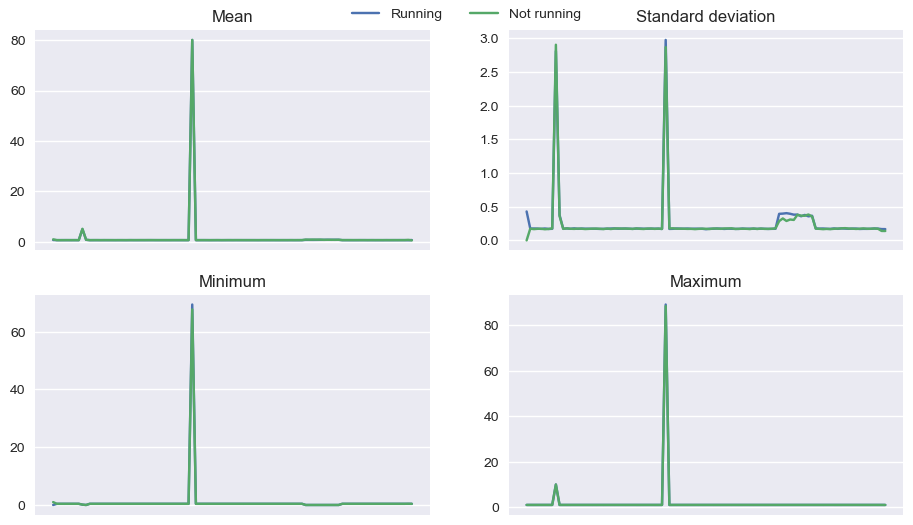

In [10]:
cleanGroup = cleanData.groupby("Running")

fig, axs = plt.subplots(2, 2)
cleanGroup.mean().T.plot(ax=axs[0,0], title="Mean", legend=False, xticks=[])
cleanGroup.std().T.plot(ax=axs[0,1], title="Standard deviation", legend=False, xticks=[])
cleanGroup.min().T.plot(ax=axs[1,0], title="Minimum", legend=False, xticks=[])
cleanGroup.max().T.plot(ax=axs[1,1], title="Maximum", legend=False, xticks=[])
fig.legend(labels = ["Running", "Not running"], ncol = 2, bbox_to_anchor = (0.53, 0.84))
plt.show()

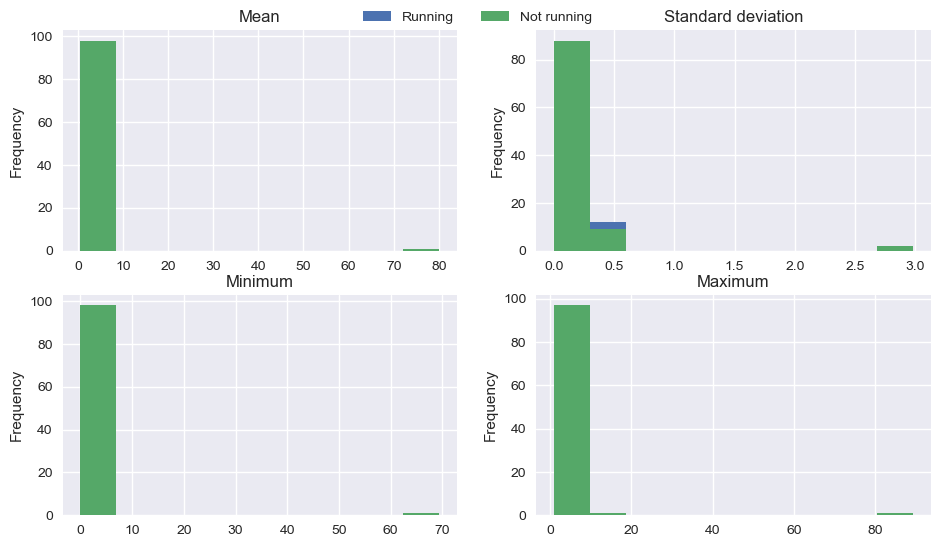

In [11]:
fig, axs = plt.subplots(2, 2)
cleanGroup.mean().T.plot(kind="hist", ax=axs[0,0], title="Mean", legend=False)
cleanGroup.std().T.plot(kind="hist", ax=axs[0,1], title="Standard deviation", legend=False)
cleanGroup.min().T.plot(kind="hist", ax=axs[1,0], title="Minimum", legend=False)
cleanGroup.max().T.plot(kind="hist", ax=axs[1,1], title="Maximum", legend=False)
fig.legend(labels = ["Running", "Not running"], ncol = 2, bbox_to_anchor = (0.54, 0.87))
plt.show()

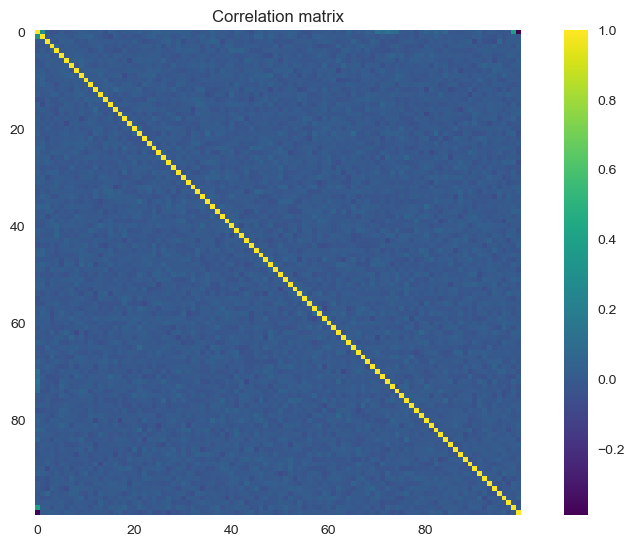

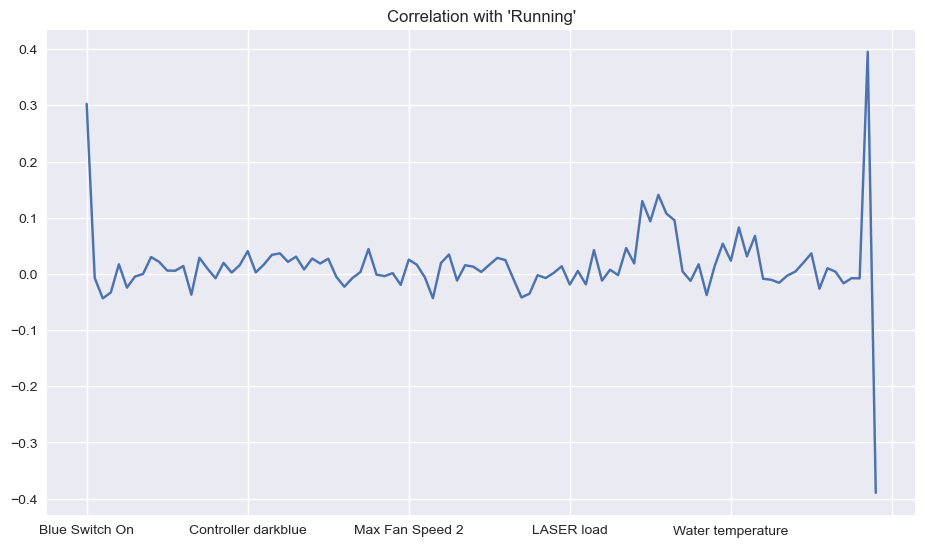

In [12]:
plt.imshow(cleanData.corr(), cmap="viridis", aspect="equal")
plt.colorbar()
plt.grid(False)
plt.title("Correlation matrix")
plt.show()

cleanData.corr()["Running"][1:].plot()
plt.title("Correlation with 'Running'")
plt.show()

In [13]:
corrCols = cleanData.loc[:, cleanData.corr()["Running"].abs() > 0.2].columns[1:]
cleanData.corr()["Running"][corrCols]

Blue Switch On          0.302716
Controller mistyrose    0.395263
Controller moccasin    -0.389610
Name: Running, dtype: float64

In [14]:
pd.crosstab(cleanData["Running"], cleanData["Blue Switch On"])

Blue Switch On,0.0,1.0
Running,,
0.0,335,1037
1.0,0,623


## Classifier 1

In [81]:
def classifier1(data, thresholds):
    switchOn = data["Blue Switch On"] == 1
    mistyroseHigh = data["Controller mistyrose"] >= thresholds[0]
    moccasinLow = data["Controller moccasin"] <= thresholds[1]
    return switchOn & mistyroseHigh & moccasinLow

In [82]:
bestError = cleanData.shape[0]

for high in np.linspace(0, 1, 101):
    for low in np.linspace(0, 1, 101):
        thresholds = [low, high]
        error = (classifier1(cleanData, thresholds) != cleanData["Running"]).sum()
        if error < bestError:
            bestError = error
            bestThresholds = thresholds

In [85]:
print(bestThresholds)
print("Test accuracy:", str(1 - bestError / cleanData.shape[0]))

[0.59, 0.72]
Test accuracy: 0.8220551378446115


## Classifier 2

In [86]:
def classifier2(data, thresholds):
    switchOn = data["Blue Switch On"] == 1
    combined = data["Controller mistyrose"] - data["Controller moccasin"] >= threshold
    return switchOn & combined

In [87]:
bestError = cleanData.shape[0]

for threshold in np.linspace(-1, 1, 1001):
    error = (classifier2(cleanData, threshold) != cleanData["Running"]).sum()
    if error < bestError:
        bestError = error
        bestThreshold = threshold

In [88]:
print(bestThreshold)
print("Test accuracy:", str(1 - bestError / cleanData.shape[0]))

0.0
Test accuracy: 0.8917293233082707


# TODO:

In [35]:
predicted_labels = np.zeros(data_test_db.shape[0])
data_test = data_test_db.values

for k in range(data_test_db.shape[0]):
    predicted_labels[k] = myclassifier(data_test[k, :], best_thresh)
    
np.savetxt('PhilippPetersens_prediction.csv', predicted_labels, delimiter=',') 

send your result via email to philipp.petersen@univie.ac.at. 
your email should also include 

- the names of all people who worked on your code, 
- their student identification number,
- a name for your team, 
- the code used.
- a short (3-4 sentence) explanation of the main idea.

The winners of the challenge receive extra points, a certificate, and may be asked to present their idea during one of the lectures. 